## Bike Rental Analysis Workflow

### Dataset
- **bike_rental.csv**

### Tasks

1. **Descriptive Statistics**
   - Generate summary statistics for all features

2. **Handle Missing Values**
   - Check for missing values
   - If error `?` exists in data, handle those values

3. **Check Distributions**
   - Analyze numerical data distributions
   - Analyze categorical data distributions

4. **Correlation Analysis**
   - Create correlation matrix
   - Generate heatmap
   - Draw insights from correlations

5. **Hypothesis Testing** (if applicable)
   - Perform statistical tests as needed

6. **Encoding**
   - Apply one-hot encoding or label encoding for categorical variables

7. **Scaling**
   - Apply standard normalization/standardization

8. **Model Training & Evaluation**
   - Split data into train/test sets
   - Train models:
     - Linear Regression
     - Polynomial Regression
     - Lasso Regression
     - Ridge Regression
   - Find best alpha for Lasso and Ridge
   - Evaluate using: R² Score, MSE, RMSE, MAE

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('Bike_Rental_data(in).csv')

# Replace '?' with NaN if exists
data.replace('?', np.nan, inplace=True)

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100543 non-null  object 
 3   yr          100571 non-null  object 
 4   mnth        100571 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100569 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100548 non-null  object 
 9   weathersit  100554 non-null  object 
 10  temp        100509 non-null  object 
 11  atemp       100534 non-null  object 
 12  hum         100539 non-null  object 
 13  windspeed   100546 non-null  object 
 14  casual      100569 non-null  object 
 15  registered  100569 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(4), object(13)
memory usage: 13.0+ MB


C:\Users\bsais\AppData\Local\Temp\ipykernel_8884\3159715332.py:15: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Bike_Rental_data(in).csv')


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.992410,1/1/2011,springer,2011,1,-0.009452,No,5.990616,No work,Clear,0.24,0.2879,0.81,0,3,13,15.999019
1,2.004157,1/1/2011,springer,2011,1,1.007925,No,5.996162,No work,Clear,0.22,0.2727,0.8,0,8,32,40.004970
2,2.984610,1/1/2011,springer,2011,1,1.993083,No,6.004768,No work,Clear,0.22,0.2727,NaN,0,5,27,32.004786
3,3.993251,1/1/2011,springer,2011,1,2.991451,No,5.980473,No work,Clear,0.24,0.2879,0.75,0,3,10,12.999856
4,4.990763,1/1/2011,springer,2011,1,4.024688,No,5.984412,No work,Clear,0.24,0.2879,0.75,0,0,1,1.002089


In [2]:
# Check missing values
print(data.isnull().sum())

# Fill numerical missing values with median
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Fill categorical missing values with mode
cat_cols = data.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values handled successfully.")


instant        0
dteday         0
season        33
yr             5
mnth           5
hr             0
holiday        7
weekday        0
workingday    28
weathersit    22
temp          67
atemp         42
hum           37
windspeed     30
casual         7
registered     7
cnt            0
dtype: int64
Missing values handled successfully.


C:\Users\bsais\AppData\Local\Temp\ipykernel_8884\1528623897.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


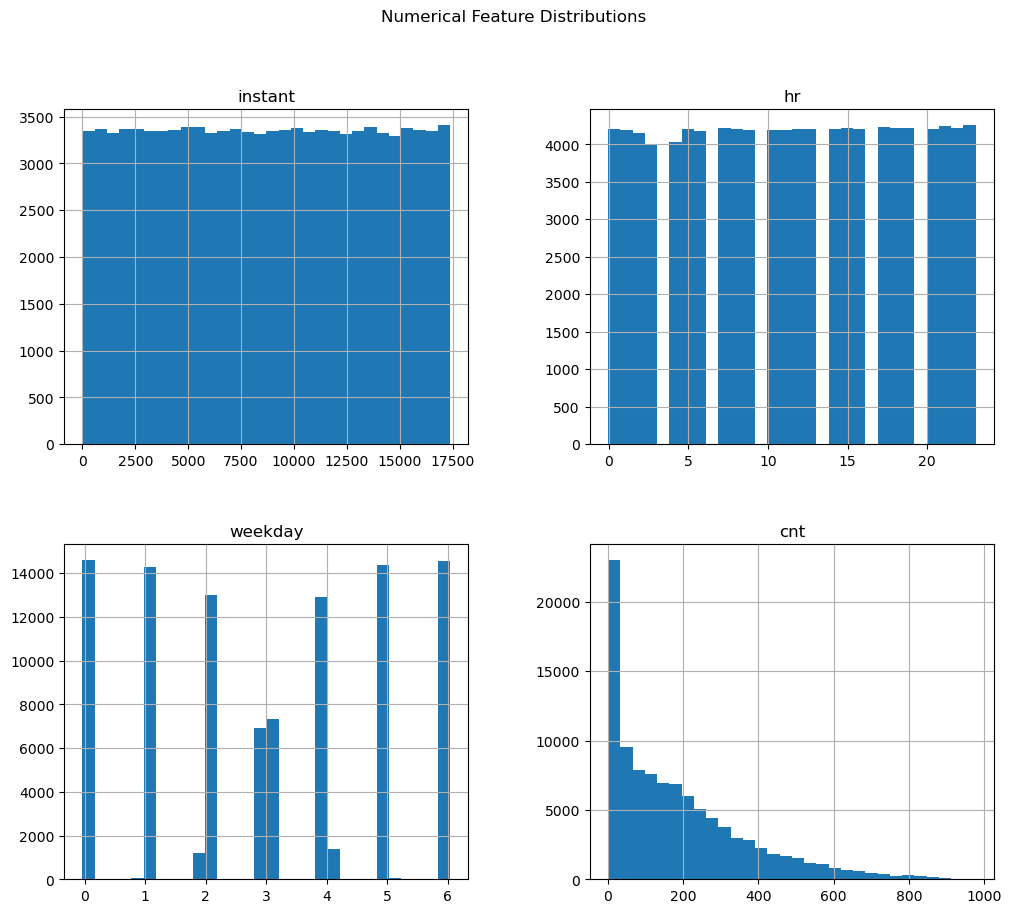

In [3]:
data[num_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()


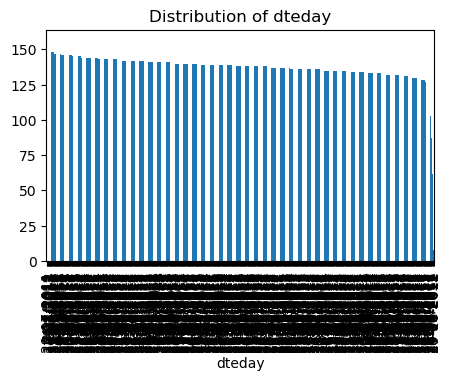

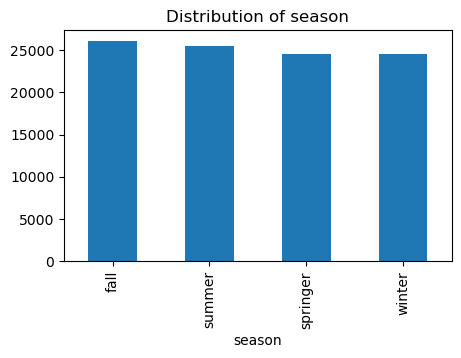

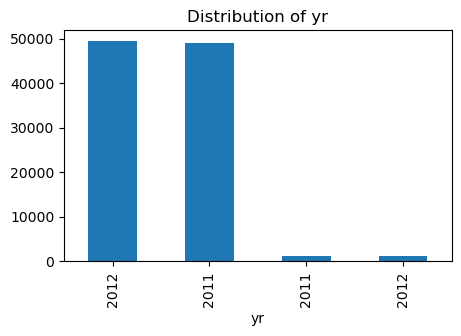

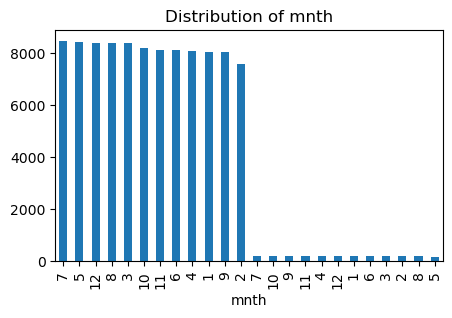

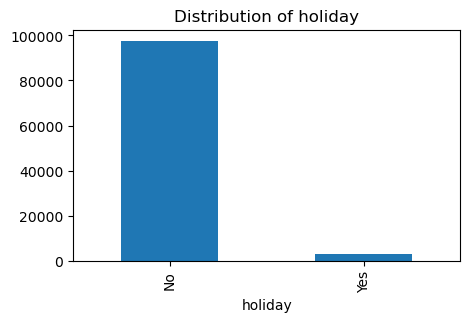

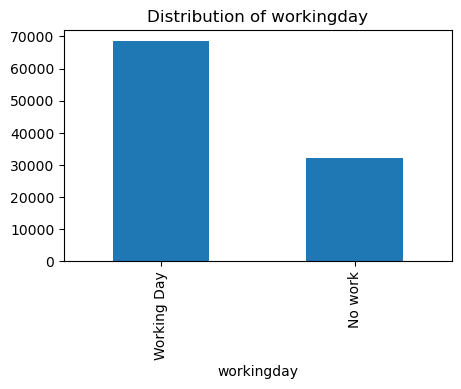

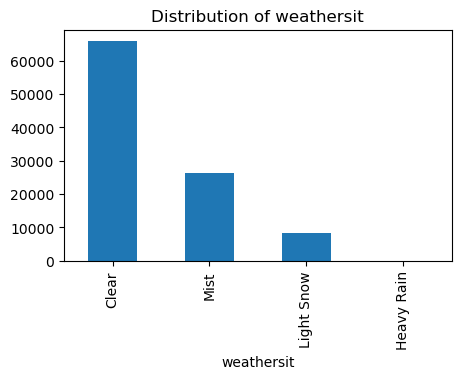

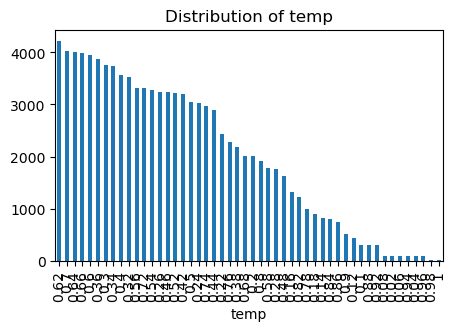

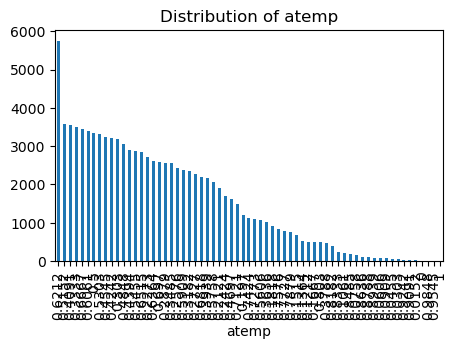

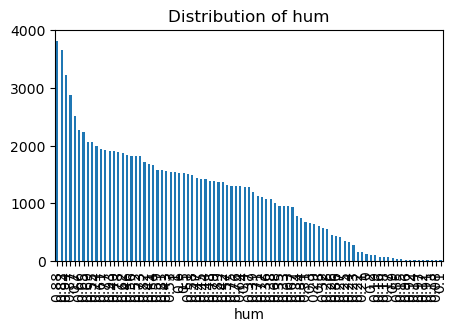

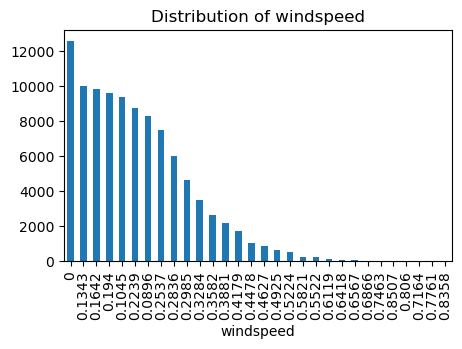

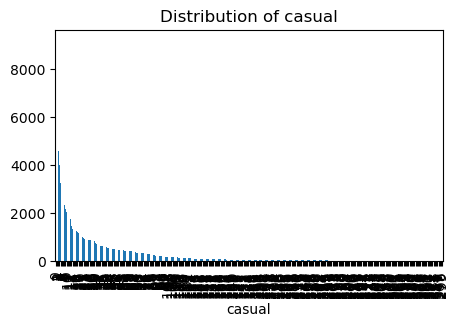

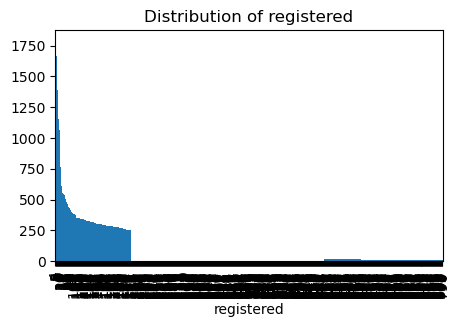

In [4]:
for col in cat_cols:
    plt.figure(figsize=(5,3))
    data[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.show()


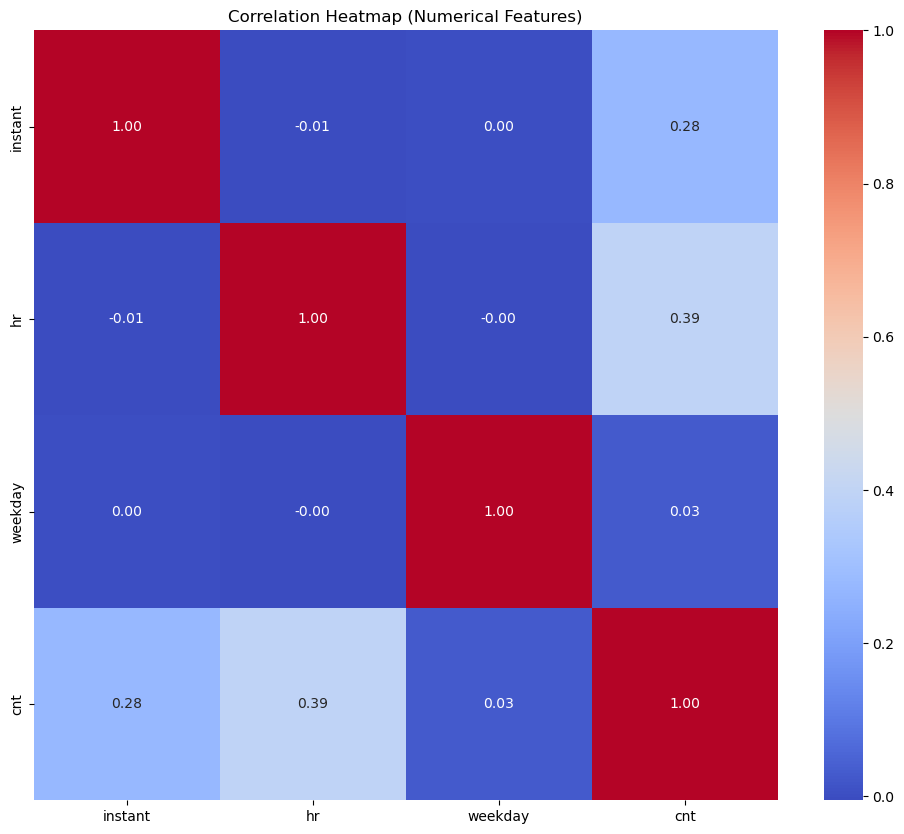

In [5]:
corr_matrix = data[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [6]:
target = 'cnt'

for col in num_cols:
    corr = data[col].corr(data[target])
    print(f"Correlation between {col} and {target}: {corr:.4f}")


Correlation between instant and cnt: 0.2775
Correlation between hr and cnt: 0.3927
Correlation between weekday and cnt: 0.0279
Correlation between cnt and cnt: 1.0000


In [8]:
from scipy.stats import ttest_ind

working = data[data['workingday'] == 'Working Day']['cnt']
non_working = data[data['workingday'] == 'No work']['cnt']

t_stat, p_value = ttest_ind(working, non_working)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print(" Significant difference in rentals")
else:
    print(" No significant difference")


T-statistic: 9.5222
P-value: 0.0000
 Significant difference in rentals


In [9]:
X = data.drop(target, axis=1)
y = data[target]

categorical_features = cat_cols
numerical_features = num_cols.drop(target)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from sklearn.preprocessing import FunctionTransformer

# Ensure categorical inputs are uniformly strings before one-hot encoding
cat_transformer = Pipeline(steps=[
    ('to_str', FunctionTransformer(lambda X: X.astype(str))),
    ('ohe', OneHotEncoder(drop='first'))
])

# Override preprocessor to use the safe categorical transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', cat_transformer, categorical_features)
    ]
)

linear_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

print("LINEAR REGRESSION")
print("R2:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


LINEAR REGRESSION
R2: 0.9999907909641961
MSE: 0.3031671566198359
RMSE: 0.5506061719776086
MAE: 0.0638270225979281


In [15]:
poly_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("\nPOLYNOMIAL REGRESSION (Degree=2)")
print("R2:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))


POLYNOMIAL REGRESSION (Degree=2)
R2: 0.9998908163751193
MSE: 3.5943924868279726
RMSE: 1.8958883107472266
MAE: 0.0996417711180193


In [16]:
alphas = [0.001, 0.01, 0.1, 1, 10]

for alpha in alphas:
    lasso = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', Lasso(alpha=alpha, max_iter=5000))
    ])
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print(f"LASSO alpha={alpha} | R2={r2_score(y_test, y_pred):.4f}")


LASSO alpha=0.001 | R2=0.9970
LASSO alpha=0.01 | R2=0.9688
LASSO alpha=0.1 | R2=0.7390
LASSO alpha=1 | R2=0.4032
LASSO alpha=10 | R2=0.2431


In [17]:
for alpha in alphas:
    ridge = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', Ridge(alpha=alpha))
    ])
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f"RIDGE alpha={alpha} | R2={r2_score(y_test, y_pred):.4f}")


RIDGE alpha=0.001 | R2=1.0000
RIDGE alpha=0.01 | R2=0.9999
RIDGE alpha=0.1 | R2=0.9985
RIDGE alpha=1 | R2=0.9921
RIDGE alpha=10 | R2=0.9513


In [18]:
models = {
    "Linear": y_pred_lr,
    "Polynomial": y_pred_poly
}

print("\nMODEL COMPARISON")
print("="*50)

for name, preds in models.items():
    print(f"{name}")
    print(f"  R2:  {r2_score(y_test, preds):.4f}")
    print(f"  RMSE:{np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print("-"*50)



MODEL COMPARISON
Linear
  R2:  1.0000
  RMSE:0.55
--------------------------------------------------
Polynomial
  R2:  0.9999
  RMSE:1.90
--------------------------------------------------


In [19]:
print("""
✔ Polynomial Regression usually captures demand patterns better
✔ Weather & temperature have strong impact on rentals
✔ Working day significantly affects demand
✔ Regularization (Lasso/Ridge) helps control overfitting
✔ Best production choice: Ridge or Polynomial (degree 2)
""")



✔ Polynomial Regression usually captures demand patterns better
✔ Weather & temperature have strong impact on rentals
✔ Working day significantly affects demand
✔ Regularization (Lasso/Ridge) helps control overfitting
✔ Best production choice: Ridge or Polynomial (degree 2)

